# WBGT and TX plots for EGU

WBGT28, TX99

delta I for WBGT99 and TX99

In [33]:
# necessary: netcdf4-python, regionmask, (xarray, geopandas), cartopy, openpyxl, (statsmodels?)

import numpy as np
import pandas as pd
import os, glob, re 
import math
import xarray as xr
import geopandas as gpd
import regionmask as regionmask
import dask
import matplotlib.pyplot as plt
import netCDF4

%matplotlib inline

#plotting
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# import my variables settings functions from other scripts
from settings_ana import *

# import fxns 
from functions_ana import *
from utils_ana import *
from plotscript import *

# import other packages/modules 

sys.path.append('../population/') # make this a module i can pip install and import ! 
from population_demographics_climate import * # move / rename this when good ! --> change to import demographics4climate as d4c


In [34]:
from dask.distributed import Client 
client = Client()
client

/apps/brussel/RL8/zen4/software/dask/2023.9.2-foss-2023a/lib/python3.11/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 34033 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:34033/status,
Dashboard: http://127.0.0.1:34033/status,Workers: 2
Total threads: 2,Total memory: 60.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:35329,Workers: 2
Dashboard: http://127.0.0.1:34033/status,Total threads: 2
Started: Just now,Total memory: 60.00 GiB
Comm: tcp://127.0.0.1:33891,Total threads: 1
Dashboard: http://127.0.0.1:33131/status,Memory: 30.00 GiB
Nanny: tcp://127.0.0.1:33811,


In [35]:
start_message() # change indir to indir obs and datasets to datasets obs in start message

flags: {'models': 'ISIMIP3b', 'experiment': None, 'metric': 'WBGT28', 'method': None, 'time_method': None, 'shift_sigma': False, 'shift_period': None, 'shift_loglike': None, 'chunk_version': None, 'var': 'wbgt'}
var: wbgt
VARs: None
indir_p: /data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP3b/InputData/climate/atmosphere/bias-adjusted/global/daily/
indir_s: /data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP3b/SecondaryInputData/climate/atmosphere/bias-adjusted/global/daily/
indir_obs: /data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP3a/InputData/climate/atmosphere/obsclim/global/daily/historical/
indir_counterclim: /data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP3a/InputData/climate/atmosphere/counterclim/global/daily/historical/
GCMs: ['CanESM5', 'CNRM-CM6-1', 'GFDL-ESM4', 'IPSL-CM6A-LR', 'MIROC6', 'MRI-ESM2-0']
datasets: ['GSWP3-W5E5', '20CRv3-ERA5', '20CRv3-W5E5']
lat_chunk: 90
lon_chunk: 120
time_chunk: -1
outdirs: /data/brussel/vo/000/bvo00012/vsc10419/

In [36]:
figdir = os.path.join(figdirs, 'fig_aug24')


## WBGT28 exceedance in pi and present-day

In [37]:
dirname='output_empirical'
dirname

'output_empirical'

In [39]:
da_p0_WBGT28, da_p1_WBGT28 = open_all_p0_p1(GCMs, metric='WBGT28', outdirname=dirname, year_pres=2023)

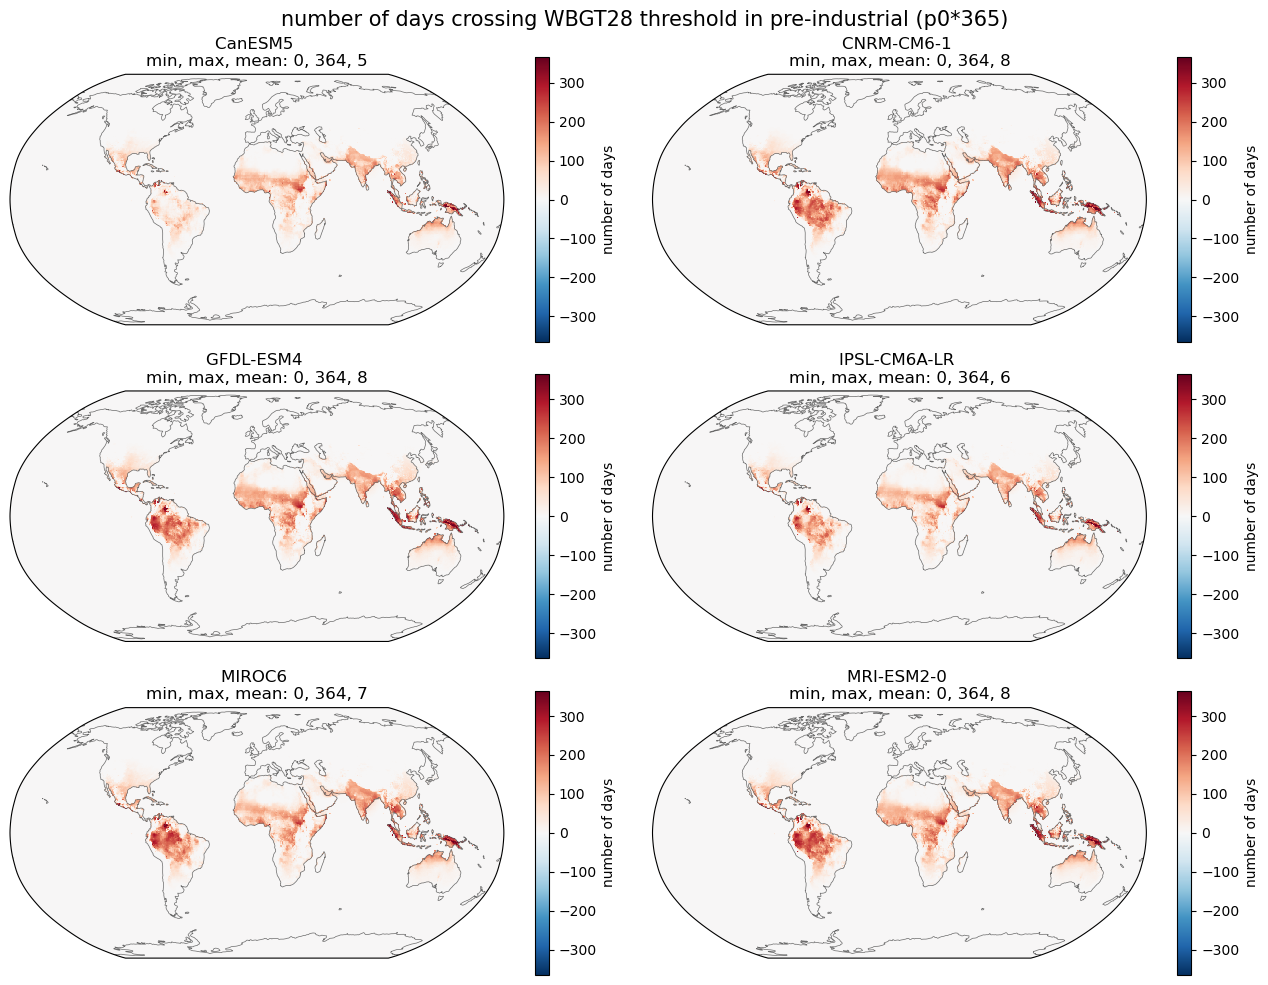

In [10]:
# p0

proj = ccrs.Robinson()
landmask = get_mask()
crs = ccrs.PlateCarree()
vmax = 365
levels = np.linspace(-vmax,vmax,num=20)

fig, axes = plt.subplots(3,2,figsize=(13,10), subplot_kw={'projection': proj})
axes = axes.flatten() 

for GCM, ax in zip(GCMs, axes):
    data_plot = (da_p0_WBGT28.sel(model=GCM) *365).rename('number of days') #*landmask
    data_plot.plot(ax=ax, cmap = 'RdBu_r', vmax=vmax, vmin=-vmax, transform=crs )  #extend='max'
    ax.set_title(f'{GCM} \nmin, max, mean: {data_plot.min():.0f}, {data_plot.max():.0f}, {data_plot.mean():.0f}')
    ax.coastlines(color='dimgray', linewidth=0.5)
    #ax.set_label('number of days')
    #ax.add_feature(cfeature.BORDERS, facecolor="none", edgecolor='dimgray', linewidth=0.5 )
    
fig.suptitle('number of days crossing WBGT28 threshold in pre-industrial (p0*365)', size=15);
fig.tight_layout()

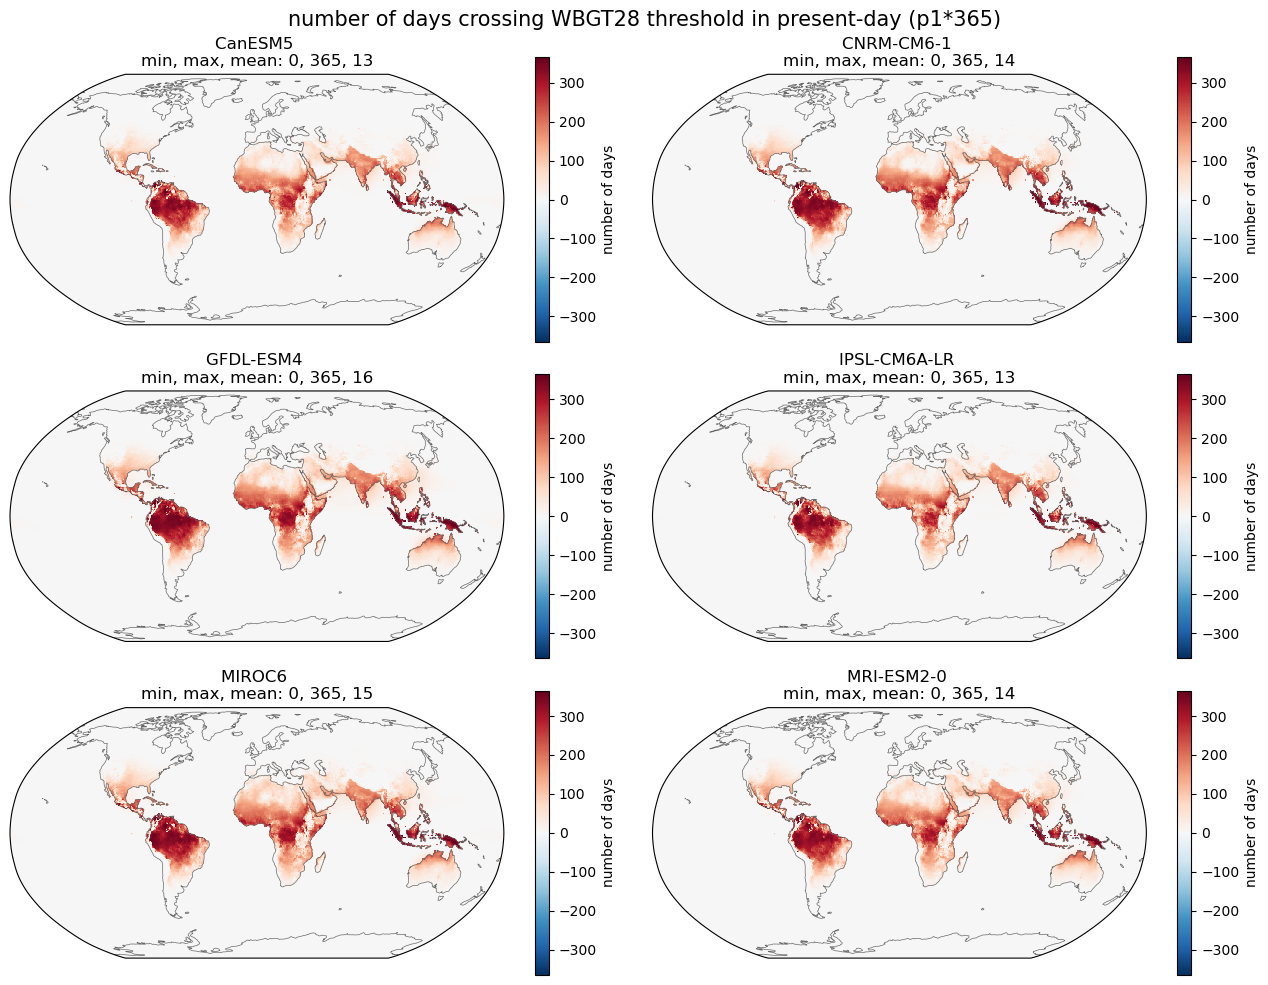

In [11]:
# p1

proj = ccrs.Robinson()
landmask = get_mask()
crs = ccrs.PlateCarree()
vmax = 365
levels = np.linspace(-vmax,vmax,num=20)

fig, axes = plt.subplots(3,2,figsize=(13,10), subplot_kw={'projection': proj})
axes = axes.flatten() 

for GCM, ax in zip(GCMs, axes):
    data_plot = (da_p1_WBGT28.sel(model=GCM) *365).rename('number of days') #*landmask
    data_plot.plot(ax=ax, cmap = 'RdBu_r', vmax=vmax, vmin=-vmax, transform=crs )  #extend='max'
    ax.set_title(f'{GCM} \nmin, max, mean: {data_plot.min():.0f}, {data_plot.max():.0f}, {data_plot.mean():.0f}')
    ax.coastlines(color='dimgray', linewidth=0.5)
    #ax.set_label('number of days')
    #ax.add_feature(cfeature.BORDERS, facecolor="none", edgecolor='dimgray', linewidth=0.5 )
    
fig.suptitle('number of days crossing WBGT28 threshold in present-day (p1*365)', size=15);
fig.tight_layout()

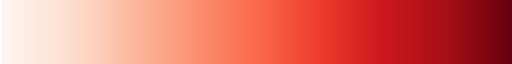

In [12]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import Reds

# Define the colors for the colormap
colors = [(1, 1, 1)] + [(c[0], c[1], c[2], 1.0) for c in Reds(np.linspace(0, 1, 256))]

# Create the colormap
cmap_name = 'white_to_red'
mycmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

mycmap

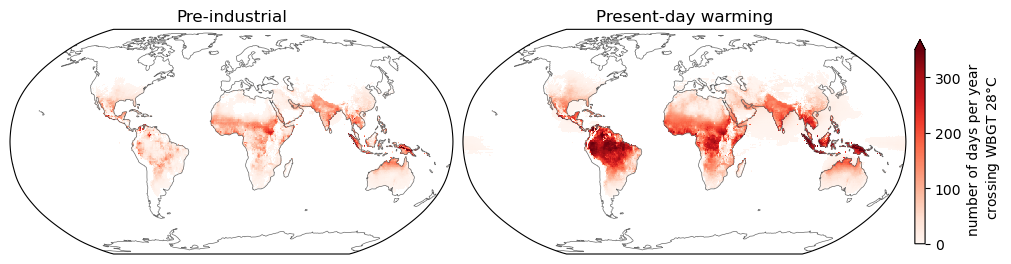

In [32]:
# plot for EGU
#import matplotlib
#matplotlib.rcParams.update(matplotlib.rcParamsDefault)

proj = ccrs.Robinson()
crs = ccrs.PlateCarree()
vmax = 350
vmin=0
levels = np.linspace(vmin,360,num=10)

fig, axes = plt.subplots(1,2, figsize=(10,3), subplot_kw={'projection': proj}, layout='constrained', facecolor='none') #,
axes = axes.flatten()  

ax=axes[0]
data_plot = (da_p0_WBGT28.isel(model=0) *365).rename('number of days') 
data_plot.where(data_plot>0).plot(ax=ax, cmap = mycmap, vmax=vmax, vmin=0, transform=crs, add_colorbar=False)   #, levels=levels
ax.coastlines(color='dimgray', linewidth=0.5)
ax.set_title('Pre-industrial')

ax=axes[1]
data_plot = (da_p1_WBGT28.isel(model=0) *365).rename('number of days') 
plot = data_plot.where(data_plot>0).plot(ax=ax, cmap = mycmap, vmax=vmax, vmin=0, transform=crs, add_colorbar=False)   #, levels=levels
ax.coastlines(color='dimgray', linewidth=0.5)
ax.set_title('Present-day warming')

cbar = fig.colorbar(plot, shrink=0.7, location='right',ax=axes, label='number of days per year \ncrossing WBGT 28$\degree$C',extend='max', pad=0.01)

#fig.suptitle(f'{data_plot.model.values}',x=0.44)


#plt.savefig(os.path.join(figdir,'wbgt_p0_p1_canesm.png'),dpi=300, transparent=False)


## Combine with demographics

In [40]:
d_countries = preprocess_all_country_population_data()
gs_population_global = get_gridscale_population_global( 
    d_countries,
    startyear=2023,
    endyear=None,
    save=False # change where this gets saved !!!! now its in package folder
)

interpolating cohort sizes per country
after interpolation and mean-preserving correction there are some neg numbers in 10, Azerbaijan, setting them to zero
after interpolation and mean-preserving correction there are some neg numbers in 98, Libya, setting them to zero
after interpolation and mean-preserving correction there are some neg numbers in 136, Papua New Guinea, setting them to zero
Aruba small, population not calculated
Antigua and Barbuda small, population not calculated
Bahrain small, population not calculated
Barbados small, population not calculated
Federated States of Micronesia small, population not calculated
Grenada small, population not calculated
Guam small, population not calculated
Saint Lucia small, population not calculated
Macao small, population not calculated
Maldives small, population not calculated
Malta small, population not calculated
Singapore small, population not calculated
Tonga small, population not calculated
calculating gridscale population per cou

In [41]:
da_nAHD_WBGT28 =  open_all_nAHD(GCMs,  metric='WBGT28', outdirname=dirname,year_pres=2023)

In [13]:
#nAHD : number of people and proportion of age group living through at least x additional days 

da_n_people_ndays, da_prop_people_ndays = calc_number_proportion_people_atleastxdays_10yr(gs_population_global, 
                                                                                          GCMs, 
                                                                                          da_nAHD_WBGT28,  
                                                                                          x_hot_days = [1,5,10,20,50])


da_n_people_1y, da_prop_people_1y = calc_number_proportion_people_atleastxdays_1yr(gs_population_global, 
                                                                                     GCMs, 
                                                                                     da_nAHD_WBGT28, 
                                                                                     x_hot_days = [1, 5, 10, 20, 50], 
                                                                                     ages_values=range(0,100),
                                                                                     grouped = False,
                                                                                     size_win = None
                                                                                    )


In [14]:
#nAHD : average per capita additional days and people x additional days 


da_nAHD_percapita_peopledays_18y = calc_percapita_hotdays_peopledays_1yr(gs_population_global, 
                                                                           GCMs, 
                                                                           da_nAHD_WBGT28,
                                                                           x_hot_days = [1, 5, 10, 20, 50], 
                                                                           ages_values=range(0,100),
                                                                           grouped = True,
                                                                           size_win = 18,
                                                                         mask_where_decr=False
                                                                           )

da_nAHD_percapita_peopledays_10y = calc_percapita_hotdays_peopledays_1yr(gs_population_global, 
                                                                           GCMs, 
                                                                           da_nAHD_WBGT28,
                                                                           x_hot_days = [1, 5, 10, 20, 50], 
                                                                           ages_values=range(0,100),
                                                                           grouped = True,
                                                                           size_win = 10,
                                                                         mask_where_decr=False
                                                                           )

da_nAHD_percapita_peopledays_1y = calc_percapita_hotdays_peopledays_1yr(gs_population_global, 
                                                                       GCMs, 
                                                                       da_nAHD_WBGT28,
                                                                       x_hot_days = [1, 5, 10, 20, 50], 
                                                                       ages_values=range(0,100),
                                                                       grouped = False,
                                                                       size_win = None,
                                                                        mask_where_decr=False
                                                                           )

## Plots WBGT 28 

Text(0.5, 1.0, 'number of people experiencing at least n attributable hot-humid days (>WBGT28) in 2022')

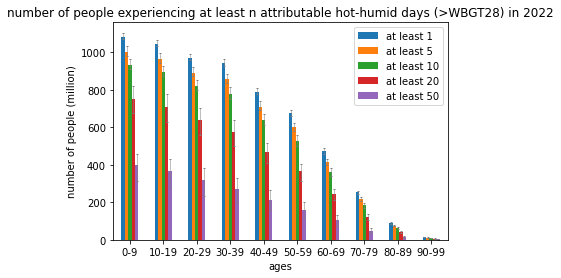

In [15]:
fig, ax = plt.subplots()
plot_barplot_n_prop_people_atleastx_modelmean(da_n_people_ndays, unit=1e6, year=2022, ax=ax, proportion=False)
#plt.legend(labels = [f'at least {x}' for x in  [1, 5, 10, 20, 50]])
ax.set_title(f'number of people experiencing at least n attributable hot-humid days (>WBGT28) in 2022')

#plt.savefig(os.path.join(figdir,'n_atleastx_2022_10yr.png'),dpi=300)

In [16]:
def plot_barplot_n_prop_people_atleastx_modelmean(da, 
                                                  unit, 
                                                  ax, 
                                                  year=2022, 
                                                  proportion=False, 
                                                  x_hot_days = [1,5,10,20,50],
                                                 legend=True,
                                                 errcolor='gray',
                                                 color=None,
                                                 title=True):
    # plot range 
    if unit == 1e9:
        unit_str = 'billions'
    elif unit == 1e6:
        unit_str='millions'
    else:
        unit_str = ''

    upper_error = (da.max(dim='model')-da.mean(dim='model')).values.T /unit
    lower_error = (da.mean(dim='model')-da.min(dim='model')).values.T /unit
    try:
        concatenated =np.concatenate((lower_error,upper_error), axis=1)
        reshaped = np.reshape(concatenated, (len(da.features), 2, len(da.age_ranges)))
    except:
        concatenated =np.concatenate((lower_error,upper_error))
        reshaped = np.reshape(concatenated, (2, len(da.age_ranges)))

    # plot multi-model mean 
    if color == None:
        (da.mean(dim='model')/unit).to_pandas().plot.bar(ax=ax,
                                                   yerr=reshaped,
                                                   error_kw=dict(ecolor=errcolor, alpha=1, elinewidth=.8, capsize=1))
    else:
        (da.mean(dim='model')/unit).to_pandas().plot.bar(ax=ax,
                                                   yerr=reshaped,
                                                         color=color,
                                                   error_kw=dict(ecolor=errcolor, alpha=1, elinewidth=.8, capsize=1))        
                          
    if proportion ==False:
        ax.set_ylabel(f'Number of people ({unit_str})')
        if title==True:
            ax.set_title(f'number of people experiencing at least n attributable hot days in {year}')
    else:
        ax.set_ylabel(f'Proportion of age group (%)')
        if title ==True:
            ax.set_title(f'proportion of age group experiencing at least n attributable hot days in {year}')
    
    ax.set_xlabel('Ages')
    step_ages = int(da.age_ranges[1] -da.age_ranges[0] - 1)
    ax.set_xticks(ticks=ax.get_xticks(), labels=[f'{x}-{x+step_ages}' for x in da.age_ranges],  rotation='horizontal')
    if legend==True:
        ax.legend(labels = [f'at least {x}' for x in x_hot_days])

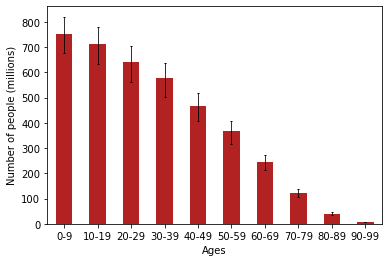

In [17]:
fig, ax = plt.subplots()
plot_barplot_n_prop_people_atleastx_modelmean(da_n_people_ndays.sel(features='n_atleast_20'), 
                                              unit=1e6,  
                                              ax=ax, 
                                              proportion=False, 
                                              legend=False,
                                              errcolor='k',
                                              color='firebrick',
                                              title=False)

#plt.savefig(os.path.join(figdir,'n_people_atleast20_wbgt28.png'),dpi=300)

In [18]:
df_summary_npeople = da_n_people_ndays.sel(features='n_atleast_20').to_pandas().T / 1e6
df_summary_npeople['mean'] = df_summary_npeople.iloc[:,0:6].mean(axis=1)
df_summary_npeople['min'] = df_summary_npeople.iloc[:,0:6].min(axis=1)
df_summary_npeople['max'] = df_summary_npeople.iloc[:,0:6].max(axis=1)
df_summary_npeople = df_summary_npeople.astype(float)

df_summary_npeople.round(decimals=1)

model,CanESM5,CNRM-CM6-1,GFDL-ESM4,IPSL-CM6A-LR,MIROC6,MRI-ESM2-0,mean,min,max
age_ranges,,,,,,,,,
0,807.5,683.1,819.9,798.9,723.5,674.6,751.3,674.6,819.9
10,770.7,643.9,778.5,762.5,674.9,630.8,710.2,630.8,778.5
20,699.4,577.3,703.9,691.2,600.6,561.7,639.0,561.7,703.9
30,634.0,520.6,637.1,628.6,536.8,503.2,576.7,503.2,637.1
40,513.8,423.3,516.7,509.8,432.9,407.6,467.4,407.6,516.7
50,405.5,332.2,404.9,404.1,333.3,315.9,366.0,315.9,405.5
60,271.2,222.7,272.6,270.1,223.7,211.7,245.3,211.7,272.6
70,133.2,109.9,136.5,132.6,110.6,104.6,121.2,104.6,136.5
80,43.2,36.1,45.7,42.7,36.8,34.7,39.9,34.7,45.7


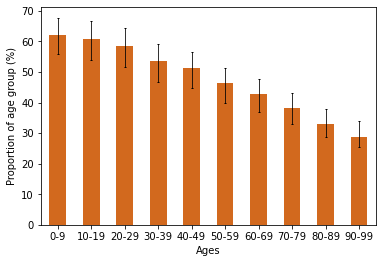

In [19]:
fig, ax = plt.subplots()
plot_barplot_n_prop_people_atleastx_modelmean(da_prop_people_ndays.sel(features='prop_atleast_20') * 100, 
                                              unit=1,  
                                              ax=ax, 
                                              proportion=True, 
                                              legend=False,
                                              errcolor='k',
                                              color='chocolate',
                                              title=False)

#plt.savefig(os.path.join(figdir,'prop_people_atleast20_wbgt28.png'),dpi=300)

In [20]:
df_summary_prop = da_prop_people_ndays.sel(features='prop_atleast_20').to_pandas().T * 100
df_summary_prop['mean'] = df_summary_prop.iloc[:,0:6].mean(axis=1)
df_summary_prop['min'] = df_summary_prop.iloc[:,0:6].min(axis=1)
df_summary_prop['max'] = df_summary_prop.iloc[:,0:6].max(axis=1)
df_summary_prop = df_summary_prop.astype(float)

df_summary_prop.round(decimals=1)

model,CanESM5,CNRM-CM6-1,GFDL-ESM4,IPSL-CM6A-LR,MIROC6,MRI-ESM2-0,mean,min,max
age_ranges,,,,,,,,,
0,66.8,56.5,67.8,66.0,59.8,55.8,62.1,55.8,67.8
10,66.0,55.1,66.6,65.3,57.8,54.0,60.8,54.0,66.6
20,64.2,53.0,64.6,63.4,55.1,51.5,58.6,51.5,64.6
30,59.0,48.4,59.3,58.5,50.0,46.8,53.7,46.8,59.3
40,56.4,46.4,56.7,55.9,47.5,44.7,51.3,44.7,56.7
50,51.4,42.1,51.3,51.2,42.2,40.0,46.4,40.0,51.4
60,47.5,39.0,47.7,47.3,39.2,37.1,43.0,37.1,47.7
70,42.1,34.8,43.2,42.0,35.0,33.1,38.4,33.1,43.2
80,35.8,29.9,37.8,35.4,30.5,28.7,33.0,28.7,37.8


## Per capita number of days

In [21]:
df_percapitadays_10y = da_nAHD_percapita_peopledays_10y.sel(features='per_capita_days').to_pandas().T
df_percapitadays_10y

model,CanESM5,CNRM-CM6-1,GFDL-ESM4,IPSL-CM6A-LR,MIROC6,MRI-ESM2-0
age_ranges,,,,,,
0,46.941558,39.640106,45.175279,44.280174,46.120519,36.490564
10,46.147836,38.458932,43.769634,43.184787,43.791245,35.222011
20,44.586401,36.770121,41.735338,41.376534,40.904648,33.477620
30,40.610641,33.406264,37.809578,37.560898,36.433541,30.474862
40,39.129623,32.098002,36.137426,36.074495,34.606520,29.280556
50,35.660773,29.218102,32.740682,32.798323,30.872098,26.659749
60,32.815254,27.014519,30.420246,30.148257,28.371934,24.662626
70,29.011581,24.097541,27.468909,26.618648,25.401418,22.188001
80,24.744086,20.732930,23.813528,22.568736,21.910932,19.219378


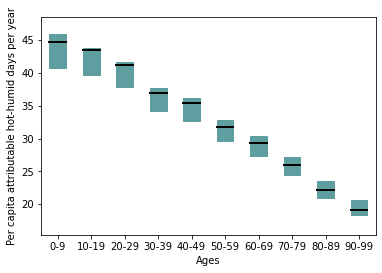

In [22]:

medianprops = dict(color='k',linewidth=2)
whiskerprops = dict(color='none')
capprops = dict(color='none')

fig, ax = plt.subplots() #figsize=(8,6)

df_plot=df_percapitadays_10y.T
plot = ax.boxplot(df_plot,  
                  whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops,
                 patch_artist=True) #boxprops=boxprops,

col='cadetblue'
for patch in plot['boxes']:
        patch.set_facecolor(col)
        patch.set_edgecolor(col)
        
ax.set_xticks(ticks=ax.get_xticks(), labels=[f'{x}-{x+9}' for x in df_plot.columns], rotation='horizontal');
plt.ylabel('Per capita attributable hot-humid days per year')
plt.xlabel('Ages');

#plt.savefig(os.path.join(figdir,'percapita_days_wbgt28.png'),dpi=300)

In [23]:
df_summary_pc = df_percapitadays_10y.copy()
df_summary_pc['median'] = df_summary_pc.iloc[:,0:6].median(axis=1)
df_summary_pc['Q1'] = df_summary_pc.iloc[:,0:6].quantile(0.25,axis=1)
df_summary_pc['Q3'] = df_summary_pc.iloc[:,0:6].quantile(0.75,axis=1)
df_summary_pc = df_summary_pc.astype(float)

df_summary_pc.round(decimals=1)

model,CanESM5,CNRM-CM6-1,GFDL-ESM4,IPSL-CM6A-LR,MIROC6,MRI-ESM2-0,median,Q1,Q3
age_ranges,,,,,,,,,
0,46.9,39.6,45.2,44.3,46.1,36.5,44.7,40.8,45.9
10,46.1,38.5,43.8,43.2,43.8,35.2,43.5,39.6,43.8
20,44.6,36.8,41.7,41.4,40.9,33.5,41.1,37.8,41.6
30,40.6,33.4,37.8,37.6,36.4,30.5,37.0,34.2,37.7
40,39.1,32.1,36.1,36.1,34.6,29.3,35.3,32.7,36.1
50,35.7,29.2,32.7,32.8,30.9,26.7,31.8,29.6,32.8
60,32.8,27.0,30.4,30.1,28.4,24.7,29.3,27.4,30.4
70,29.0,24.1,27.5,26.6,25.4,22.2,26.0,24.4,27.3
80,24.7,20.7,23.8,22.6,21.9,19.2,22.2,21.0,23.5


## TX99 summary plots 

In [24]:
dirname=outdirnames['TX99']
da_nAHD_TX99 =  open_all_nAHD(GCMs,  metric='TX99', outdirname=dirname)

In [25]:
#nAHD : number of people and proportion of age group living through at least x additional days 

da_n_people_ndays_TX99, da_prop_people_ndays_TX99 = calc_number_proportion_people_atleastxdays_10yr(gs_population_global, 
                                                                                          GCMs, 
                                                                                          da_nAHD_TX99,  
                                                                                          x_hot_days = [1,5,10,20,50])

In [26]:

da_nAHD_percapita_peopledays_10y_TX99 = calc_percapita_hotdays_peopledays_1yr(gs_population_global, 
                                                                           GCMs, 
                                                                           da_nAHD_TX99,
                                                                           x_hot_days = [1, 5, 10, 20, 50], 
                                                                           ages_values=range(0,100),
                                                                           grouped = True,
                                                                           size_win = 10,
                                                                         mask_where_decr=False
                                                                           )

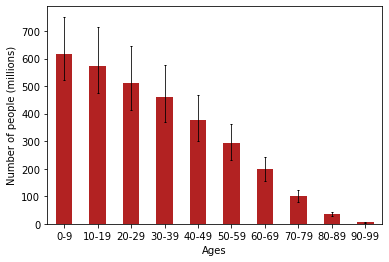

In [27]:
fig, ax = plt.subplots()
plot_barplot_n_prop_people_atleastx_modelmean(da_n_people_ndays_TX99.sel(features='n_atleast_10'),  #.sel(features='n_atleast_20')
                                              unit=1e6,  
                                              ax=ax, 
                                              proportion=False, 
                                              legend=False,
                                              errcolor='k',
                                              color='firebrick',
                                              title=False)

#plt.savefig(os.path.join(figdir,'n_people_atleast10_tx99.png'),dpi=300)

In [28]:
df_summary_npeople = da_n_people_ndays_TX99.sel(features='n_atleast_10').to_pandas().T / 1e6
df_summary_npeople['mean'] = df_summary_npeople.iloc[:,0:6].mean(axis=1)
df_summary_npeople['min'] = df_summary_npeople.iloc[:,0:6].min(axis=1)
df_summary_npeople['max'] = df_summary_npeople.iloc[:,0:6].max(axis=1)
df_summary_npeople = df_summary_npeople.astype(float)

df_summary_npeople.round(decimals=1)

model,CanESM5,CNRM-CM6-1,GFDL-ESM4,IPSL-CM6A-LR,MIROC6,MRI-ESM2-0,mean,min,max
age_ranges,,,,,,,,,
0,751.7,635.4,560.7,671.0,563.3,520.4,617.1,520.4,751.7
10,713.0,583.7,526.5,626.9,515.7,474.1,573.3,474.1,713.0
20,644.5,513.2,475.9,556.8,453.3,413.0,509.5,413.0,644.5
30,577.5,463.2,459.6,489.9,405.0,369.8,460.8,369.8,577.5
40,469.0,377.7,385.5,393.0,329.0,300.8,375.8,300.8,469.0
50,360.7,295.1,326.2,295.1,251.9,231.2,293.4,231.2,360.7
60,243.9,201.9,225.4,197.7,172.5,155.2,199.4,155.2,243.9
70,123.0,103.4,121.8,98.1,89.4,78.4,102.4,78.4,123.0
80,42.6,36.2,44.2,33.0,32.4,27.2,35.9,27.2,44.2


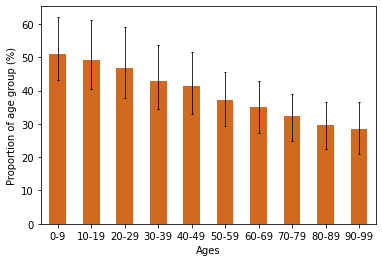

In [29]:
fig, ax = plt.subplots()
plot_barplot_n_prop_people_atleastx_modelmean(da_prop_people_ndays_TX99.sel(features='prop_atleast_10') * 100, #
                                              unit=1,  
                                              ax=ax, 
                                              proportion=True, 
                                              legend=False,
                                              errcolor='k',
                                              color='chocolate', #
                                              title=False)

#plt.savefig(os.path.join(figdir,'prop_people_atleast10_tx99.png'),dpi=300)

In [30]:
df_summary_prop = da_prop_people_ndays_TX99.sel(features='prop_atleast_10').to_pandas().T * 100
df_summary_prop['mean'] = df_summary_prop.iloc[:,0:6].mean(axis=1)
df_summary_prop['min'] = df_summary_prop.iloc[:,0:6].min(axis=1)
df_summary_prop['max'] = df_summary_prop.iloc[:,0:6].max(axis=1)
df_summary_prop = df_summary_prop.astype(float)

df_summary_prop.round(decimals=1)

model,CanESM5,CNRM-CM6-1,GFDL-ESM4,IPSL-CM6A-LR,MIROC6,MRI-ESM2-0,mean,min,max
age_ranges,,,,,,,,,
0,62.1,52.5,46.4,55.5,46.6,43.0,51.0,43.0,62.1
10,61.0,50.0,45.1,53.7,44.2,40.6,49.1,40.6,61.0
20,59.1,47.1,43.7,51.1,41.6,37.9,46.7,37.9,59.1
30,53.7,43.1,42.8,45.6,37.7,34.4,42.9,34.4,53.7
40,51.5,41.4,42.3,43.1,36.1,33.0,41.2,33.0,51.5
50,45.7,37.4,41.3,37.4,31.9,29.3,37.2,29.3,45.7
60,42.7,35.4,39.5,34.6,30.2,27.2,34.9,27.2,42.7
70,38.9,32.7,38.5,31.0,28.3,24.8,32.4,24.8,38.9
80,35.3,30.0,36.7,27.4,26.8,22.5,29.8,22.5,36.7


In [31]:
df_percapitadays_10y = da_nAHD_percapita_peopledays_10y_TX99.sel(features='per_capita_days').to_pandas().T
#df_percapitadays_10y

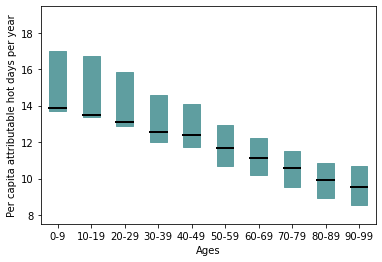

In [32]:
medianprops = dict(color='k',linewidth=2)
whiskerprops = dict(color='none')
capprops = dict(color='none')

fig, ax = plt.subplots() #figsize=(8,6)

df_plot=df_percapitadays_10y.T
plot = ax.boxplot(df_plot,  
                  whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops,
                 patch_artist=True) #boxprops=boxprops,

col='cadetblue'
for patch in plot['boxes']:
        patch.set_facecolor(col)
        patch.set_edgecolor(col)
        
ax.set_xticks(ticks=ax.get_xticks(), labels=[f'{x}-{x+9}' for x in df_plot.columns], rotation='horizontal');
plt.ylabel('Per capita attributable hot days per year')
plt.xlabel('Ages');

#plt.savefig(os.path.join(figdir,'percapita_days_tx99.png'),dpi=300)

In [33]:
df_summary_pc = df_percapitadays_10y.copy()
df_summary_pc['median'] = df_summary_pc.iloc[:,0:6].median(axis=1)
df_summary_pc['Q1'] = df_summary_pc.iloc[:,0:6].quantile(0.25,axis=1)
df_summary_pc['Q3'] = df_summary_pc.iloc[:,0:6].quantile(0.75,axis=1)
df_summary_pc = df_summary_pc.astype(float)

df_summary_pc.round(decimals=1)

model,CanESM5,CNRM-CM6-1,GFDL-ESM4,IPSL-CM6A-LR,MIROC6,MRI-ESM2-0,median,Q1,Q3
age_ranges,,,,,,,,,
0,18.0,13.8,13.7,13.5,18.9,14.0,13.9,13.7,17.0
10,17.8,13.4,13.5,13.1,17.9,13.5,13.5,13.4,16.7
20,17.5,12.8,13.2,12.6,16.7,13.0,13.1,12.9,15.9
30,16.3,12.0,12.9,11.7,15.2,12.1,12.5,12.0,14.6
40,15.9,11.7,12.9,11.3,14.5,11.9,12.4,11.7,14.1
50,14.6,10.6,12.4,10.3,13.1,10.9,11.7,10.7,12.9
60,13.9,10.1,11.9,9.8,12.3,10.4,11.1,10.2,12.2
70,12.9,9.5,11.5,9.2,11.6,9.7,10.6,9.5,11.5
80,12.0,8.9,10.9,8.6,10.9,9.0,9.9,8.9,10.9


## Change in intensity plots: WBGT99 and TX99 

In [43]:
# WBGT99

#dirname=outdirnames['WBGT99']
#dirname

da_WBGT99_deltaI = open_all_deltaI(GCMs, metric='WBGT99', outdirname=dirname,year_pres=2023)


da_avgdeltaI_10y_WBGT99 = calc_averagedeltaI_peragegroup(gs_population_global, 
                               GCMs, 
                               da_WBGT99_deltaI, 
                               ages_values=range(0,100),
                               grouped = True,
                               size_win = 10
                               )

In [37]:
#dirname=outdirnames['TX99']
#dirname

da_TX99_deltaI = open_all_deltaI(GCMs, metric='TX99', outdirname=dirname)

da_avgdeltaI_10y_TX99 = calc_averagedeltaI_peragegroup(gs_population_global, 
                               GCMs, 
                               da_TX99_deltaI, 
                               ages_values=range(0,100),
                               grouped = True,
                               size_win = 10
                               )

In [45]:
df_avgdeltaI_10y_WBGT99 = da_avgdeltaI_10y_WBGT99.sel(features='avg_deltaI').to_pandas().T
df_avgdeltaI_10y_WBGT99

model,CanESM5,CNRM-CM6-1,GFDL-ESM4,IPSL-CM6A-LR,MIROC6,MRI-ESM2-0
age_ranges,,,,,,
0,1.600424,1.102604,1.275574,1.259339,1.187284,1.063139
10,1.600187,1.089570,1.265587,1.252354,1.150374,1.054274
20,1.601861,1.077210,1.254845,1.247382,1.116537,1.044610
30,1.586286,1.061028,1.256272,1.238500,1.102410,1.058213
40,1.586401,1.062478,1.255882,1.238430,1.103555,1.063536
50,1.564483,1.037720,1.255278,1.229751,1.087075,1.065993
60,1.572787,1.051234,1.252863,1.239983,1.112828,1.078486
70,1.574234,1.057186,1.253020,1.248353,1.143482,1.088271
80,1.594640,1.083317,1.254866,1.268252,1.200994,1.103093


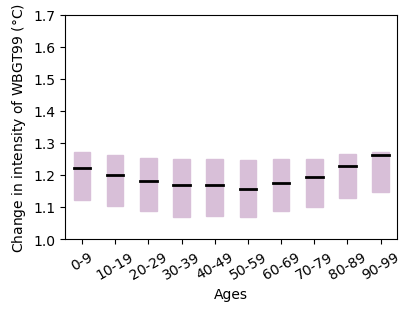

In [62]:
medianprops = dict(color='k',linewidth=2)
whiskerprops = dict(color='none')
capprops = dict(color='none')

fig, ax = plt.subplots(facecolor='none',figsize=(4,3),layout='constrained') #figsize=(8,6)

df_plot=df_avgdeltaI_10y_WBGT99.T
plot = ax.boxplot(df_plot,  
                  whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops,
                 patch_artist=True, showfliers=False) #boxprops=boxprops,

col='thistle'
for patch in plot['boxes']:
        patch.set_facecolor(col)
        patch.set_edgecolor(col)
        
ax.set_xticks(ticks=ax.get_xticks(), labels=[f'{x}-{x+9}' for x in df_plot.columns], rotation=30);
ax.set_ylim(1,1.7)

plt.ylabel('Change in intensity of WBGT99 ($\degree$C)')
plt.xlabel('Ages');

#plt.savefig(os.path.join(figdir,'deltaI_perage_WBGT99_sml.png'),dpi=300,transparent=True)

In [55]:
df_avgdeltaI_10y_TX99 = da_avgdeltaI_10y_TX99.sel(features='avg_deltaI').to_pandas().T
df_avgdeltaI_10y_TX99

model,CanESM5,CNRM-CM6-1,GFDL-ESM4,IPSL-CM6A-LR,MIROC6,MRI-ESM2-0
age_ranges,,,,,,
0,1.681682,1.278317,1.192769,1.444423,1.350383,1.173140
10,1.689111,1.265731,1.195982,1.437521,1.290550,1.147040
20,1.696614,1.257179,1.206073,1.433993,1.242352,1.128171
30,1.658146,1.246706,1.240924,1.422236,1.219856,1.120555
40,1.652492,1.250000,1.254617,1.421217,1.214865,1.121522
50,1.600878,1.225469,1.281225,1.409218,1.186182,1.100946
60,1.604999,1.245480,1.280459,1.423071,1.205283,1.111042
70,1.597710,1.259823,1.297327,1.436483,1.231866,1.120273
80,1.625094,1.298789,1.317562,1.461094,1.282446,1.145063


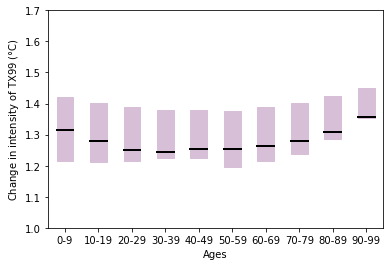

In [60]:
medianprops = dict(color='k',linewidth=2)
whiskerprops = dict(color='none')
capprops = dict(color='none')

fig, ax = plt.subplots() #figsize=(8,6)

df_plot=df_avgdeltaI_10y_TX99.T
plot = ax.boxplot(df_plot,  
                  whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops,
                 patch_artist=True,
                 showfliers=False) #boxprops=boxprops,

col='thistle'
for patch in plot['boxes']:
        patch.set_facecolor(col)
        patch.set_edgecolor(col)
        
ax.set_xticks(ticks=ax.get_xticks(), labels=[f'{x}-{x+9}' for x in df_plot.columns], rotation='horizontal');
plt.ylabel('Change in intensity of TX99 ($\degree$C)')
plt.xlabel('Ages');
ax.set_ylim(1,1.7)

#plt.savefig(os.path.join(figdir,'deltaI_perage_TX99.png'),dpi=300)

## Population map

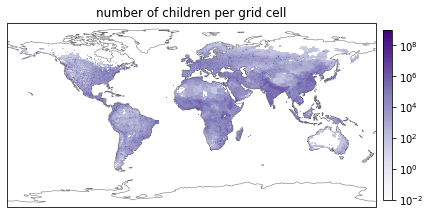

In [115]:
import matplotlib

crs = ccrs.PlateCarree()

fig, ax = plt.subplots( subplot_kw={'projection': crs}, figsize=(6,6), layout='constrained') #

plot = gs_population_global.sel(ages=slice(0,17)).sum(dim='ages').plot(cmap='Purples', vmin=0.01, vmax=1e9, norm=matplotlib.colors.LogNorm(), ax=ax, transform=crs, extend='max',  add_colorbar=False)

cbar = fig.colorbar(plot, shrink=0.4, pad=0.02,location='right',ax=ax, label='people')
cbar.set_label(' ',labelpad=.01)

ax.set_extent([-181, 181, -90, 90], crs=ccrs.PlateCarree())
ax.coastlines(color='dimgray', linewidth=0.5)

plt.title('number of children per grid cell');

#plt.savefig(os.path.join(figdir,'map_children_per_gridcell.png'),dpi=300)